Radio Map Construction Based on Sionna

In [1]:
import numpy as np
import mitsuba as mi
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import or install Sionna
try:
    import sionna.rt
except ImportError as e:
    import os
    os.system("pip install sionna-rt")
    import sionna.rt

from sionna.rt import load_scene, Camera, Transmitter, Receiver, PlanarArray,\
                      PathSolver, RadioMapSolver, load_mesh, watt_to_dbm, transform_mesh,\
                      cpx_abs_square

no_preview = True # Toggle to False to use the preview widget
                  # instead of rendering for scene visualization

Property Design: RX/TX Antenna array, Location, Orientation, Power. & RM

In [2]:
scene = load_scene() # Load empty scene

# Configure antenna arrays for all transmitters and receivers
scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             pattern="iso",
                             polarization="V")
scene.rx_array = scene.tx_array

# Define and add a first transmitter to the scene
tx0 = Transmitter(name='tx0',
                  position=[150, -100, 20],
                  orientation=[np.pi*5/6, 0, 0],
                  power_dbm=44)
scene.add(tx0)

# Compute radio map
rm_solver = RadioMapSolver()
rm = rm_solver(scene,
               max_depth=5,           # Maximum number of ray scene interactions
               samples_per_tx=10**7 , # If you increase: less noise, but more memory required
               cell_size=(5, 5),      # Resolution of the radio map
               center=[0, 0, 0],      # Center of the radio map
               size=[400, 400],       # Total size of the radio map
               orientation=[0, 0, 0]) # Orientation of the radio map, e.g., could be also vertical

Show Radio Map (RSS, Pathloss, SINR)

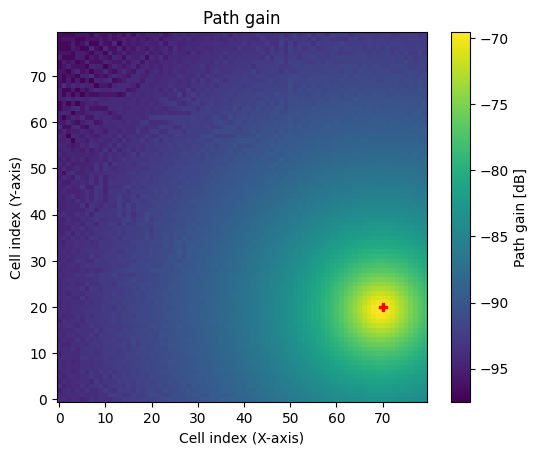

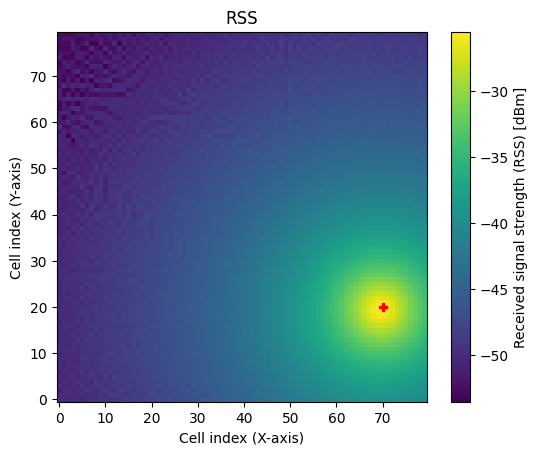

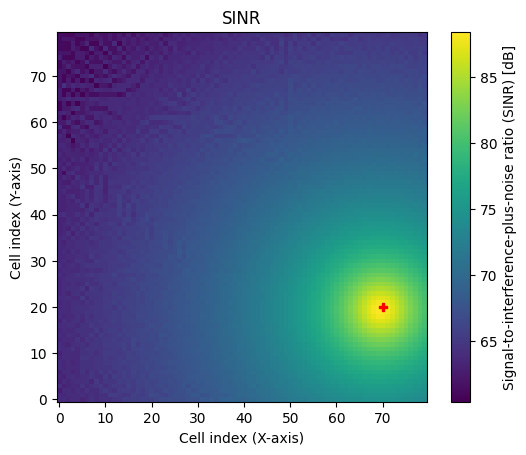

In [3]:
# Visualize path gain
rm.show(metric="path_gain");

# Visualize received signal strength (RSS)
rm.show(metric="rss");

# Visulaize SINR
rm.show(metric="sinr");

Add another TX

In [4]:
tx2 = Transmitter(name='tx2',
                  position=np.array([0, 150 * np.tan(np.pi/3) - 100, 20]),
                  orientation=[-np.pi/2, 0, 0],
                  power_dbm=27)
scene.add(tx2)

# Compute radio map
rm_solver = RadioMapSolver()
rm = rm_solver(scene,
               max_depth=5,           # Maximum number of ray scene interactions
               samples_per_tx=10**7 , # If you increase: less noise, but more memory required
               cell_size=(5, 5),      # Resolution of the radio map
               center=[0, 0, 0],      # Center of the radio map
               size=[400, 400],       # Total size of the radio map
               orientation=[0, 0, 0]) # Orientation of the radio map, e.g., could be also vertical

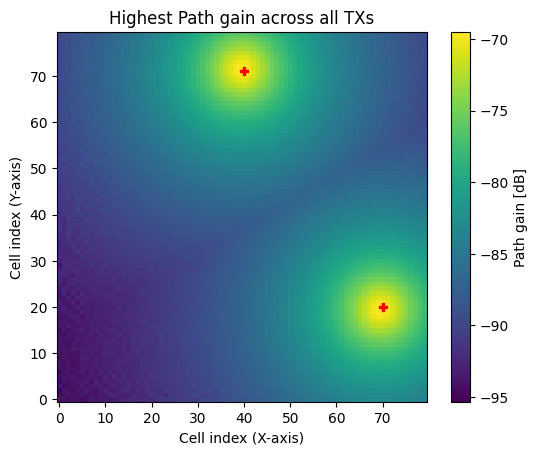

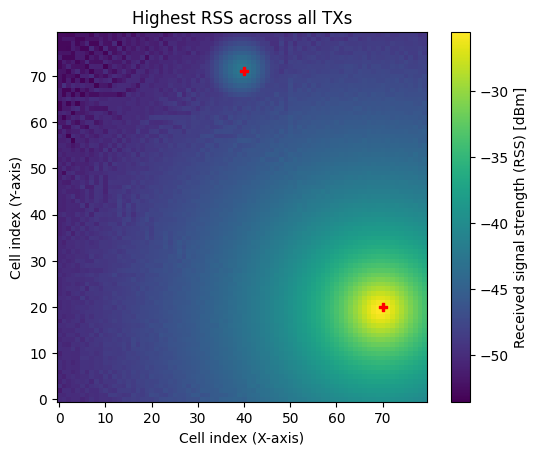

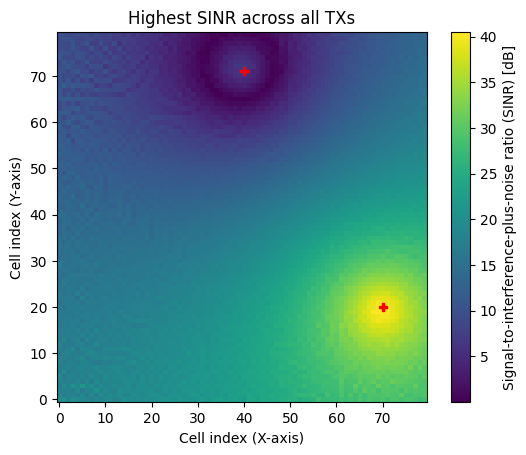

In [5]:
# Visualize path gain
rm.show(metric="path_gain");

# Visualize received signal strength (RSS)
rm.show(metric="rss");

# Visulaize SINR
rm.show(metric="sinr");

In [4]:
scene = load_scene(sionna.rt.scene.san_francisco)
scene1 = load_scene(sionna.rt.scene.simple_street_canyon_with_cars,merge_shapes=False)
car_2 = scene1.get("car_2")
car_2.position = [465, 100, 0.75]
scene.add(car_2)
# Use a single antenna with isotropic pattern
scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             pattern="iso",
                             polarization="V")

# Add a transmitter+
scene.add(Transmitter(name="tx",
                      position=[468, 106, 70],
                      orientation=[0, 0, 0],
                      display_radius=5))

ValueError: Cannot add object of type <class 'sionna.rt.scene_object.SceneObject'> to the scene. The input must be a Transmitter, Receiver, or RadioMaterialBase.

In [7]:
# Clone the terrain mesh
mesurement_surface = scene.objects["Terrain"].clone(as_mesh=True)
# Shift the terrain upwards by 1.5 meters
transform_mesh(mesurement_surface, translation=np.array([0, 0, 1.5]))

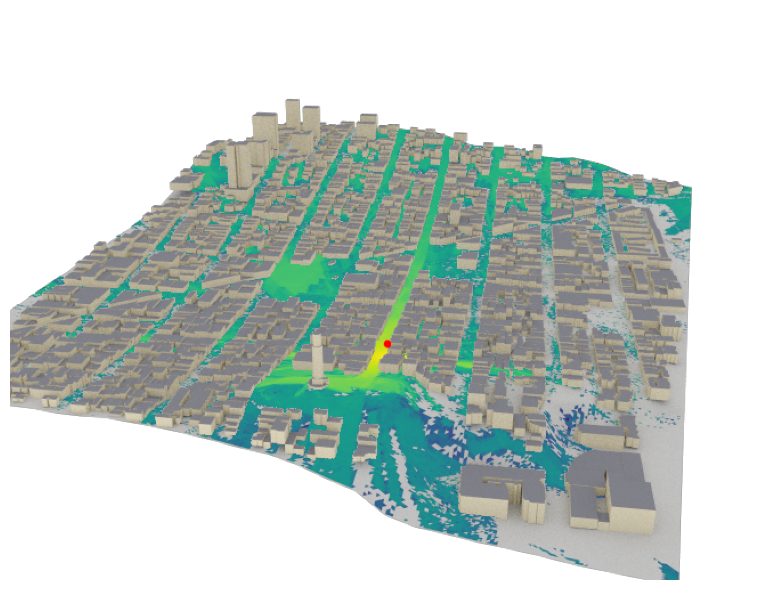

In [8]:
rm = rm_solver(scene,
               measurement_surface=mesurement_surface,
               samples_per_tx=10**8,
               max_depth=5)

if no_preview:
    cam = Camera(position=[1400, 400, 575])
    cam.look_at(np.array([310, 50, 60]))
    scene.render(camera=cam,
                 radio_map=rm);
else:
    scene.preview(radio_map=rm, rm_vmin=-100);